<a href="https://colab.research.google.com/github/lkostenko/vehicle_sales_project/blob/main/Vehicle_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vehicle sales

## Imports

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
import kagglehub
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import ttest_rel
import requests
from io import StringIO
import concurrent.futures
from mlxtend.frequent_patterns import apriori, association_rules

In [126]:
path = kagglehub.dataset_download("syedanwarafridi/vehicle-sales-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/syedanwarafridi/vehicle-sales-data/versions/1


In [127]:
path = '/root/.cache/kagglehub/datasets/syedanwarafridi/vehicle-sales-data/versions/1'
os.listdir(path)

['car_prices.csv']

In [128]:
csv_file = os.path.join(path, 'car_prices.csv')
df_kaggle = pd.read_csv(csv_file)

## Initial Data Exploration

In [129]:
df_kaggle.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [130]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [131]:
df_kaggle.nunique()

,0
year,34
make,96
model,973
trim,1963
body,87
transmission,4
vin,550297
state,64
condition,41
odometer,172278


Usually, transmissions come in 2 types. So I'll check the unique values:

In [132]:
df_kaggle.transmission.unique()

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

In [133]:
df_kaggle[(df_kaggle['transmission'] == 'Sedan') | (df_kaggle['transmission'] == 'sedan')]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500
417835,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500
421289,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700
424161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250
427040,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300
427043,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj6fm218641,NaN,49.0,12655,red,black,NaN,13850.0,14500
434424,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj7fm223475,NaN,46.0,15719,blue,black,NaN,13650.0,13500
444501,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm297123,NaN,2.0,6388,white,black,NaN,13850.0,10700
453794,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm219943,NaN,44.0,16633,silver,black,NaN,13600.0,13600
461597,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj9fm219766,NaN,44.0,11034,black,black,NaN,13900.0,13000


I see that the content of the columns is misaligned – so change it. I am selecting the indexes I will work with.

In [134]:
index_list_sedan = df_kaggle[(df_kaggle['transmission'] == 'Sedan') | (df_kaggle['transmission'] == 'sedan')].index.tolist()

In [135]:
index_list_sedan

[408161,
 417835,
 421289,
 424161,
 427040,
 427043,
 434424,
 444501,
 453794,
 461597,
 461612,
 492484,
 497008,
 497011,
 499083,
 501455,
 505299,
 505306,
 520461,
 528996,
 529009,
 529013,
 529622,
 548784,
 551222,
 554710]

In [136]:
df_kaggle.loc[df_kaggle.index.isin(index_list_sedan), 'body'] = 'Sedan'
df_kaggle.loc[df_kaggle.index.isin(index_list_sedan), 'transmission'] = 'automatic'

In [137]:
new_values_dict = {
    408161: {'vin': '3vwd17aj4fm201708', 'state': None, 'condition': 46.0, 'odometer': 4802, 'color': 'silver', 'interior': 'gray', 'seller': None, 'mmr': 13200.0, 'sellingprice': 16500, 'saledate': None},
    417835: {'vin': '3vwd17aj2fm258506', 'state': None, 'condition': 1.0, 'odometer': 9410, 'color': 'white', 'interior': 'gray', 'seller': None, 'mmr': 13300.0, 'sellingprice': 10500, 'saledate': None},
    421289: {'vin': '3vwd17aj3fm276741', 'state': None, 'condition': 46.0, 'odometer': 1167, 'color': 'blue', 'interior': 'black', 'seller': None, 'mmr': 13200.0, 'sellingprice': 12700, 'saledate': None},
    424161: {'vin': '3vwd17aj2fm285365', 'state': None, 'condition': 1.0, 'odometer': 2172, 'color': 'gray', 'interior': 'black', 'seller': None, 'mmr': 14050.0, 'sellingprice': 8250, 'saledate': None},
    427040: {'vin': '3vwd17aj0fm227318', 'state': None, 'condition': 41.0, 'odometer': 14872, 'color': 'gray', 'interior': 'black', 'seller': None, 'mmr': 13700.0, 'sellingprice': 14300, 'saledate': None},
    427043: {'vin': '3vwd17aj6fm218641', 'state': None, 'condition': 49.0, 'odometer': 12655, 'color': 'red', 'interior': 'black', 'seller': None, 'mmr': 13850.0, 'sellingprice': 14500, 'saledate': None},
    434424: {'vin': '3vwd17aj7fm223475', 'state': None, 'condition': 46.0, 'odometer': 15719, 'color': 'blue', 'interior': 'black', 'seller': None, 'mmr': 13650.0, 'sellingprice': 13500, 'saledate': None},
    444501: {'vin': '3vwd17aj5fm297123', 'state': None, 'condition': 2.0, 'odometer': 6388, 'color': 'white', 'interior': 'black', 'seller': None, 'mmr': 13850.0, 'sellingprice': 10700, 'saledate': None},
    453794: {'vin': '3vwd17aj5fm219943', 'state': None, 'condition': 44.0, 'odometer': 16633, 'color': 'silver', 'interior': 'black', 'seller': None, 'mmr': 13600.0, 'sellingprice': 13600, 'saledate': None},
    461597: {'vin': '3vwd17aj9fm219766', 'state': None, 'condition': 44.0, 'odometer': 11034, 'color': 'black', 'interior': 'black', 'seller': None, 'mmr': 13900.0, 'sellingprice': 13000, 'saledate': None},
    461612: {'vin': '3vwd17aj3fm259017', 'state': None, 'condition': 46.0, 'odometer': 2711, 'color': 'white', 'interior': 'black', 'seller': None, 'mmr': 14250.0, 'sellingprice': 14000, 'saledate': None},
    492484: {'vin': '3vwd17aj5fm206111', 'state': None, 'condition': 2.0, 'odometer': 6864, 'color': 'gray', 'interior': 'black', 'seller': None, 'mmr': 14000.0, 'sellingprice': 9800, 'saledate': None},
    497008: {'vin': '3vwd17aj5fm273601', 'state': None, 'condition': 28.0, 'odometer': 339, 'color': 'black', 'interior': 'black', 'seller': None, 'mmr': 14300.0, 'sellingprice': 12900, 'saledate': None},
    497011: {'vin': '3vwd17aj5fm221322', 'state': None, 'condition': 48.0, 'odometer': 18384, 'color': 'silver', 'interior': 'black', 'seller': None, 'mmr': 13550.0, 'sellingprice': 13500, 'saledate': None},
    499083: {'vin': '3vwd17aj5fm268964', 'state': None, 'condition': 2.0, 'odometer': 9887, 'color': 'red', 'interior': 'black', 'seller': None, 'mmr': 13900.0, 'sellingprice': 9900, 'saledate': None},
    501455: {'vin': '3vwd17aj6fm231972', 'state': None, 'condition': 38.0, 'odometer': 9837, 'color': 'red', 'interior': 'black', 'seller': None, 'mmr': 13500.0, 'sellingprice': 12900, 'saledate': None},
    505299: {'vin': '3vwd17aj7fm222388', 'state': None, 'condition': 36.0, 'odometer': 20379, 'color': 'silver', 'interior': 'black', 'seller': None, 'mmr': 13600.0, 'sellingprice': 13500, 'saledate': None},
    505306: {'vin': '3vwd17aj7fm218440', 'state': None, 'condition': 42.0, 'odometer': 20627, 'color': 'white', 'interior': 'black', 'seller': None, 'mmr': 13600.0, 'sellingprice': 13500, 'saledate': None},
    520461: {'vin': '3vwd17ajxfm315938', 'state': None, 'condition': 1.0, 'odometer': 721, 'color': 'blue', 'interior': 'gray', 'seller': None, 'mmr': 14100.0, 'sellingprice': 8500, 'saledate': None},
    528996: {'vin': '3vwd17aj7fm229552', 'state': None, 'condition': 38.0, 'odometer': 6158, 'color': 'black', 'interior': 'black', 'seller': None, 'mmr': 13650.0, 'sellingprice': 13400, 'saledate': None},
    529009: {'vin': '3vwd17aj8fm298895', 'state': None, 'condition': 2.0, 'odometer': 2817, 'color': 'red', 'interior': 'black', 'seller': None, 'mmr': 13750.0, 'sellingprice': 12200, 'saledate': None},
    529013: {'vin': '3vwd17aj4fm236636', 'state': None, 'condition': 5.0, 'odometer': 5705, 'color': None, 'interior': 'black', 'seller': None, 'mmr': 13400.0, 'sellingprice': 15250, 'saledate': None},
    529622: {'vin': '3vwd17aj5fm225953', 'state': None, 'condition': 41.0, 'odometer': 18561, 'color': 'black', 'interior': 'black', 'seller': None, 'mmr': 13200.0, 'sellingprice': 13100, 'saledate': None},
    548784: {'vin': '3vwd17aj7fm326640', 'state': None, 'condition': 2.0, 'odometer': 2846, 'color': 'blue', 'interior': 'black', 'seller': None, 'mmr': 13600.0, 'sellingprice': 7500, 'saledate': None},
    551222: {'vin': '3vwd17aj8fm239622', 'state': None, 'condition': 2.0, 'odometer': 9562, 'color': 'silver', 'interior': 'black', 'seller': None, 'mmr': 13200.0, 'sellingprice': 12100, 'saledate': None},
    554710: {'vin': '3vwd17aj2fm261566', 'state': None, 'condition': 48.0, 'odometer': 5001, 'color': 'blue', 'interior': 'gray', 'seller': None, 'mmr': 13400.0, 'sellingprice': 13600, 'saledate': None}
}


In [138]:
for index in index_list_sedan:
    if index in new_values_dict:
        df_kaggle.loc[index, list(new_values_dict[index].keys())] = list(new_values_dict[index].values())

In [139]:
df_kaggle.loc[df_kaggle.index.isin(index_list_sedan)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj4fm201708,None,46.0,4802.0,silver,gray,None,13200.0,16500.0,None
417835,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj2fm258506,None,1.0,9410.0,white,gray,None,13300.0,10500.0,None
421289,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj3fm276741,None,46.0,1167.0,blue,black,None,13200.0,12700.0,None
424161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj2fm285365,None,1.0,2172.0,gray,black,None,14050.0,8250.0,None
427040,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj0fm227318,None,41.0,14872.0,gray,black,None,13700.0,14300.0,None
427043,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj6fm218641,None,49.0,12655.0,red,black,None,13850.0,14500.0,None
434424,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj7fm223475,None,46.0,15719.0,blue,black,None,13650.0,13500.0,None
444501,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj5fm297123,None,2.0,6388.0,white,black,None,13850.0,10700.0,None
453794,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj5fm219943,None,44.0,16633.0,silver,black,None,13600.0,13600.0,None
461597,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj9fm219766,None,44.0,11034.0,black,black,None,13900.0,13000.0,None


In [140]:
df_kaggle.isna().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,0
state,26
condition,11794
odometer,94


### Handling Missing "Make" Data Using VIN

There are 10,301 missing values in the "make" column. Since the VIN (Vehicle Identification Number) can provide detailed vehicle information, I will use the [NHTSA API](https://vpic.nhtsa.dot.gov/api) to decode the VIN and fill in the missing make and model values.

I will focus on VINs where the make is unknown, but the VIN is not empty. Using this data, I can query the API to retrieve and populate the missing vehicle details.

In [141]:
"""
def get_vin_list(df):


    This function filters the DataFrame, selecting rows where 'make' is missing and 'vin' is present,
    and returns a list of VINs.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'make' and 'vin' columns.

    Returns:
    list: A list of VINs from the filtered rows.

    filtered_df = df[df['make'].isna() & df['vin'].notna()]
    vin_list = filtered_df['vin'].tolist()
    return vin_list

"""

"\ndef get_vin_list(df):\n\n    \n    This function filters the DataFrame, selecting rows where 'make' is missing and 'vin' is present,\n    and returns a list of VINs.\n\n    Parameters:\n    df (pd.DataFrame): DataFrame containing 'make' and 'vin' columns.\n\n    Returns:\n    list: A list of VINs from the filtered rows.\n    \n    filtered_df = df[df['make'].isna() & df['vin'].notna()]\n    vin_list = filtered_df['vin'].tolist()\n    return vin_list\n    \n"

In [142]:
#vin_list_kaggle = get_vin_list(df_kaggle)

In [143]:
'''
# Function to get vehicle data by VIN
def get_vehicle_data(vin):
    url = f'https://vpic.nhtsa.dot.gov/api/vehicles/DecodeVinValues/{vin}?format=csv'
    try:
        response = requests.get(url, timeout=10)  # Set a timeout for the request

        if response.status_code == 200:
            data = pd.read_csv(StringIO(response.text))

            # Select only the necessary columns
            columns_to_extract = ['vin', 'bodyclass', 'drivetype', 'fueltypeprimary', 'make', 'manufacturer', 'model', 'modelyear', 'trim', 'vehicletype']

            if all(col in data.columns for col in columns_to_extract):
                data_filtered = data[columns_to_extract]
                return data_filtered
            else:
                return pd.DataFrame([{'vin': vin, 'error': 'Required columns not found'}])
        else:
            return pd.DataFrame([{'vin': vin, 'error': f'Request error: {response.status_code}'}])
    except Exception as e:
        return pd.DataFrame([{'vin': vin, 'error': str(e)}])

# Function to process VINs using multithreading
def process_vins_parallel(vin_list):
    results = []
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:  # Using thread pool
        futures = {executor.submit(get_vehicle_data, vin): vin for vin in vin_list}
        for future in concurrent.futures.as_completed(futures):
            vin = futures[future]
            try:
                result = future.result()
                results.append(result)
            except Exception as e:
                print(f"Error processing VIN {vin}: {e}")

    # Combine all results into one DataFrame
    final_df = pd.concat(results, ignore_index=True)
    return final_df
    '''

'\n# Function to get vehicle data by VIN\ndef get_vehicle_data(vin):\n    url = f\'https://vpic.nhtsa.dot.gov/api/vehicles/DecodeVinValues/{vin}?format=csv\'\n    try:\n        response = requests.get(url, timeout=10)  # Set a timeout for the request\n\n        if response.status_code == 200:\n            data = pd.read_csv(StringIO(response.text))\n\n            # Select only the necessary columns\n            columns_to_extract = [\'vin\', \'bodyclass\', \'drivetype\', \'fueltypeprimary\', \'make\', \'manufacturer\', \'model\', \'modelyear\', \'trim\', \'vehicletype\']\n\n            if all(col in data.columns for col in columns_to_extract):\n                data_filtered = data[columns_to_extract]\n                return data_filtered\n            else:\n                return pd.DataFrame([{\'vin\': vin, \'error\': \'Required columns not found\'}])\n        else:\n            return pd.DataFrame([{\'vin\': vin, \'error\': f\'Request error: {response.status_code}\'}])\n    except Ex

In [144]:
#final_df = process_vins_parallel(vin_list_kaggle)

In [145]:
#final_df

In [146]:
'''
file_path = '/content/drive/MyDrive/курс Аналітик/Фінальний проєкт/vin_data1.csv'
final_df.to_csv(file_path, index=False)
'''

"\nfile_path = '/content/drive/MyDrive/курс Аналітик/Фінальний проєкт/vin_data1.csv'\nfinal_df.to_csv(file_path, index=False)\n"

Since up to 300 VINs can be processed at a time, I have created a file where I store the VINs that have already been decoded.

In [147]:
file_path1  = '/content/drive/MyDrive/курс Аналітик/Фінальний проєкт/VINValues.csv'

In [148]:
df_vin = pd.read_csv(file_path1)

In [149]:
df_vin.head()

,vin,bodyclass,drivetype,fueltypeprimary,make,manufacturer,model,modelyear,trim,vehicletype
0,wbakb8c58cc962863,Sedan/Saloon,NaN,Gasoline,BMW,BMW AG,750Li / ALPINA B7,2012.0,750Li / Alpina B7 LWB (500 hp),PASSENGER CAR
1,wbakb8c59cc448049,Sedan/Saloon,NaN,Gasoline,BMW,BMW AG,750Li / ALPINA B7,2012.0,750Li / Alpina B7 LWB (500 hp),PASSENGER CAR
2,wbakb8c50cc964249,Sedan/Saloon,NaN,Gasoline,BMW,BMW AG,750Li / ALPINA B7,2012.0,750Li / Alpina B7 LWB (500 hp),PASSENGER CAR
3,salmf1e48ca360609,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,NaN,Gasoline,LAND ROVER,JAGUAR LAND ROVER LIMITED,Range Rover,2012.0,HSE LUX,MULTIPURPOSE PASSENGER VEHICLE (MPV)
4,wbakb8c54cc964089,Sedan/Saloon,NaN,Gasoline,BMW,BMW AG,750Li / ALPINA B7,2012.0,750Li / Alpina B7 LWB (500 hp),PASSENGER CAR


I am merging two DataFrames by the 'vin' column.

In [150]:
df_merged = pd.merge(df_kaggle, df_vin[['vin', 'make', 'model', 'trim']], on='vin', how='left')

In [151]:
df_merged['make'] = df_merged['make_x'].fillna(df_merged['make_y'])
df_merged['model'] = df_merged['model_x'].fillna(df_merged['model_y'])
df_merged['trim'] = df_merged['trim_x'].fillna(df_merged['trim_y'])

In [152]:
df_merged = df_merged.drop(columns=['make_x', 'make_y', 'model_x', 'model_y', 'trim_x', 'trim_y'])

In [153]:
df_merged.head()


,year,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,make,model,trim
0,2015,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Kia,Sorento,LX
1,2015,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Kia,Sorento,LX
2,2014,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),BMW,3 Series,328i SULEV
3,2015,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Volvo,S60,T5
4,2014,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),BMW,6 Series Gran Coupe,650i


In [154]:
df_merged.isna().sum()

,0
year,0
body,13630
transmission,65780
vin,0
state,26
condition,11794
odometer,95
color,750
interior,749
seller,26


Since not all VIN codes have been decoded yet, I am extracting the make from the VIN code using the data from the following link: [WMI VIN Query Data](https://github.com/iotlabsltd/pyvin/blob/master/data/wmi_vinquery.csv#L2).

In [155]:
file_path_wmi = '/content/drive/MyDrive/курс Аналітик/Фінальний проєкт/wmi_vinquery.csv'
df_wmi = pd.read_csv(file_path_wmi, header=None, names=['WMI', 'Make'])

In [156]:
wmi_dict = pd.Series(df_wmi.Make.values, index=df_wmi.WMI).to_dict()

In [157]:
def get_vin_list(df):
    """
    This function filters the DataFrame by selecting rows where 'make' is missing and 'vin' is present,
    and returns a list of VINs.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'make' and 'vin' columns.

    Returns:
    list: A list of VINs from the filtered rows.
    """
    filtered_df = df[df['make'].isna() & df['vin'].notna()]
    vin_list = filtered_df['vin'].tolist()
    return vin_list

In [158]:
vin_list = get_vin_list(df_merged)

In [159]:
vin_list_upper = [vin.upper() for vin in vin_list]

In [160]:
def get_make_from_vin(vin):
    wmi = vin[:3]
    return wmi_dict.get(wmi, 'Unknown')

In [161]:
makes = [get_make_from_vin(vin) for vin in vin_list_upper]

In [162]:
df_make = pd.DataFrame({
    'vin': vin_list_upper,
    'make': makes
})

In [163]:
df_make

,vin,make
0,KMHD25LH1EU160894,Hyundai
1,KMHD25LH1EU160894,Hyundai
2,KMHD25LH1EU160894,Hyundai
3,KMHD25LH1EU160894,Hyundai
4,KMHD25LH1EU160894,Hyundai
...,...,...
8705,4N2XN11TXYD844711,Nissan
8706,JTJBT20X770129305,Lexus
8707,4A4JN2AS6BE029938,Mitsubishi
8708,1G1YY24U355116011,Chevrolet


We are merging df_make into merged_df on the 'vin' column using the merge function.

In [164]:
df_merged['vin'] = df_merged['vin'].str.upper()

In [165]:
df_make_unique = df_make.drop_duplicates(subset='vin', keep='first')

In [166]:
df = df_merged.merge(df_make_unique[['vin', 'make']], on='vin', how='left', suffixes=('', '_new'))

In [167]:
df['make'] = df['make'].combine_first(df['make_new'])

In [168]:
df.drop(columns=['make_new'], inplace=True)

In [169]:
df.isna().sum()

,0
year,0
body,13630
transmission,65780
vin,0
state,26
condition,11794
odometer,95
color,750
interior,749
seller,26


### Data Cleaning and Transformation

#### Working with the "Make" Column

In [170]:
df.make.unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', 'bmw', 'Dodge', 'FIAT',
       'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC', 'LAND ROVER',
       'mitsubishi', 'Ram', 'smart', 'FORD', 'chevrolet', 'Bentley',
       'chrysler', 'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'PORSCHE',
       'Mercury', 'HUMMER', 'landrover', 'cadillac', 'CHEVROLET',
       'land rover', 'mercedes', 'mazda', 'toyota', 'lexus', 'HONDA',
       'gmc truck', 'honda', 'nissan', 'porsche', 'Saab', 'Suzuki',
       'MAZDA', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile', 'hyundai',
       'jeep', 'PONTIAC', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'DODGE', 'MITSUBISHI', 'audi',
       'Rolls-Royce', 'gmc', 'LEXUS', 'm

In [171]:
df['make'] = df['make'].str.lower()

In [172]:
df['make'] = df['make'].replace({
    'gmc truck': 'gmc',
    'ford tk': 'ford',
    'landrover': 'land rover',
    'mazda tk': 'mazda',
    'mercedes-b': 'mercedes-benz',
    'vw': 'volkswagen',
    'chev truck': 'chevrolet',
    'ford truck': 'ford',
    'hyundai tk': 'hyundai',
    'gmc truck': 'gmc'
})


In [173]:
df['make'] = df['make'].str.title()

In [174]:
df.make.unique()

array(['Kia', 'Bmw', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'Mini',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'Fiat', 'Chrysler',
       'Ferrari', 'Honda', 'Gmc', 'Ram', 'Smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'Hummer', 'Mercedes', 'Saab',
       'Suzuki', 'Oldsmobile', 'Isuzu', 'Dodge Tk', 'Geo', 'Rolls-Royce',
       'Daewoo', 'Plymouth', 'Tesla', 'Airstream', 'Dot', 'Aston Martin',
       'Fisker', 'Datsun', 'Unknown', 'Am General', 'Amc', 'Lamborghini',
       'Lotus'], dtype=object)

#### Working with the "Body" Column

In [175]:
df.body.unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crew

In [176]:
df['body'] = df['body'].str.lower()

In [177]:
df.body.unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', nan, 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'supercrew', 'cts coupe', 'extended cab',
       'e-series van', 'supercab', 'regular cab', 'g convertible', 'koup',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'cab plus', 'beetle convertible',
       'tsx sport wagon', 'promaster cargo van',
       'granturismo convertible', 'cts-v wagon', 'ram van', 'transit van',
       'regular-cab'], dtype=object)

Grouping and Replacing Similar Values

In [178]:
df['body'] = df['body'].replace({
    'g coupe': 'coupe',
    'g sedan': 'sedan',
    'elantra coupe': 'coupe',
    'genesis coupe': 'coupe',
    'g convertible': 'convertible',
    'granturismo convertible': 'convertible',
    'cts-v coupe': 'coupe',
    'g37 convertible': 'convertible',
    'cts wagon': 'wagon',
    'g37 coupe': 'coupe',
    'q60 convertible': 'convertible',
    'q60 coupe': 'coupe',
    'beetle convertible': 'convertible',
    'ram van': 'van',
    'transit van': 'van',
    'promaster cargo van': 'van',
    'regular-cab': 'truck',
    'supercab': 'truck',
    'supercrew': 'truck',
    'regular cab': 'truck',
    'crew cab': 'truck',
    'double cab': 'truck',
    'crewmax cab': 'truck',
    'extended cab': 'truck',
    'king cab': 'truck',
    'quad cab': 'truck',
    'xtracab': 'truck',
    'cab plus 4': 'truck',
    'cab plus': 'truck',
    'minivan': 'van',
    'wagon': 'wagon',
    'sedan': 'sedan',
    'suv': 'suv',
    'hatchback': 'hatchback',
    'coupe': 'coupe',
    'convertible': 'convertible',
    'van': 'van',
    'tsx sport wagon': 'wagon',
    'cts-v wagon': 'wagon',
    'cts coupe': 'coupe',
    'koup': 'coupe',
    'access cab': 'truck',
    'club cab': 'truck',
    'mega cab': 'truck',
    'navitgation': 'navigation'
})


In [179]:
df.body.unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'truck', 'van', nan, 'e-series van'], dtype=object)

In [180]:
df['body'] = df['body'].fillna(df['body'].mode()[0])

In [181]:
df['body'].value_counts()

,count
body,
sedan,262416
suv,143844
truck,47540
van,30136
hatchback,26237
coupe,20163
wagon,16180
convertible,10933
e-series van,1823


#### Working with the "Transmission" Column

In [182]:
df.transmission.unique()

array(['automatic', nan, 'manual'], dtype=object)

Fill missing values with mode

In [183]:
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])

In [184]:
df['transmission'].value_counts()

,count
transmission,
automatic,541728
manual,17544


#### Working with the "Interior" and "Color" Columns

In [185]:
df.interior.unique()

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       nan, 'silver', 'off-white', 'blue', 'red', 'yellow', 'green',
       'purple', 'orange', 'gold'], dtype=object)

In [186]:
df['interior'] = df['interior'].replace('—', 'other')

In [187]:
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])

In [188]:
df.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime', None], dtype=object)

In [189]:
df['color'] = df['color'].replace('—', 'other')

In [190]:
df['color'] = df['color'].fillna(df['color'].mode()[0])

#### Working with the "Saledate" Column

In [191]:
df.dropna(subset=['saledate'], inplace=True)

In [192]:
df['saledate'] = df['saledate'].str.replace(' GMT.*', '', regex=True)

In [193]:
df['saledate'] = pd.to_datetime(df['saledate'], format='%a %b %d %Y %H:%M:%S')

In [194]:
df['saleday'] = df['saledate'].dt.strftime('%d-%m-%Y')

In [195]:
df['saletime'] = df['saledate'].dt.strftime('%H:%M:%S')

#### Working with the "Trim" and "Model" Columns

In [196]:
df.trim.value_counts()

,count
trim,
Base,55868
SE,43684
LX,20801
Limited,18386
LT,16953
...,...
XJ6 Sovereign,1
Lux Plus,1
2.5GT Limited,1


In [197]:
df['trim'] = df['trim'].fillna('other')

In [198]:
df.model.value_counts()

,count
model,
Altima,19349
F-150,14523
Fusion,12947
Camry,12545
Escape,11886
...,...
uplandr,1
Deville,1
335i,1


In [199]:
df['model'] = df['model'].fillna('other')

#### Handling Missing Values in Numerical Columns

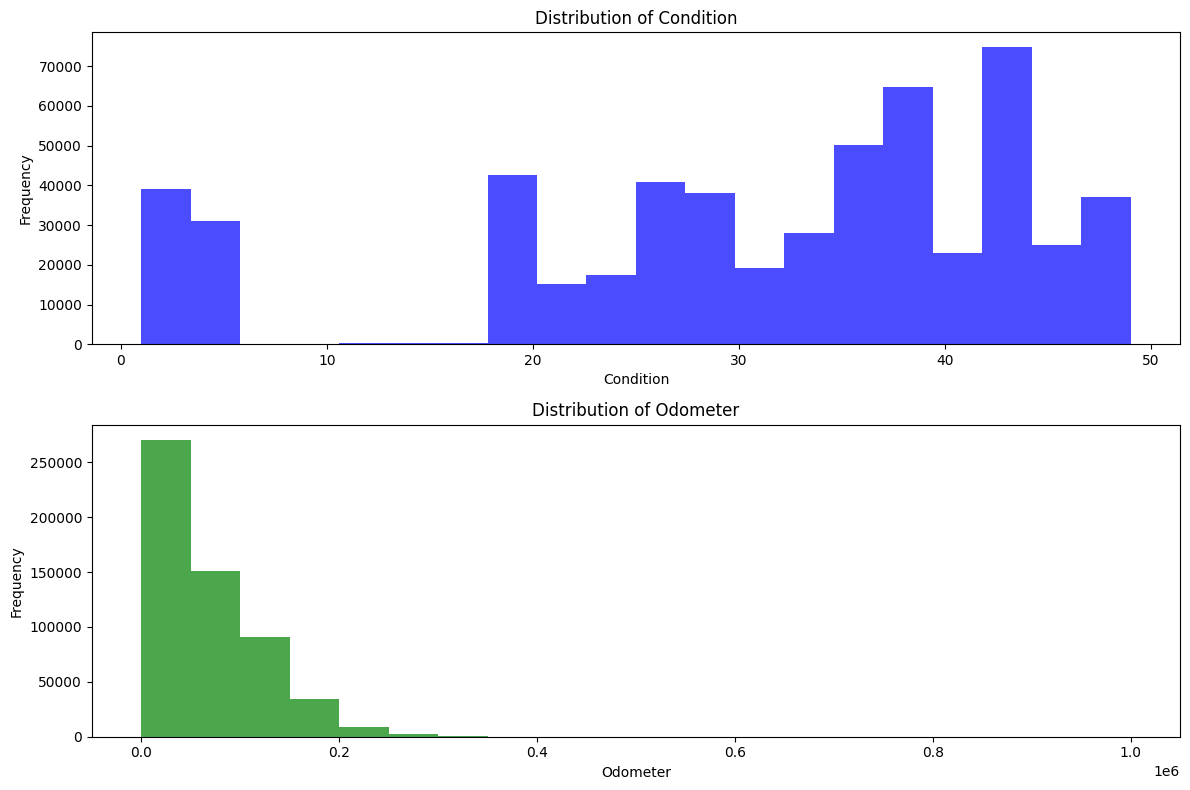

In [200]:
plt.figure(figsize=(12, 8))

# Plot histogram for 'condition'
plt.subplot(2, 1, 1)
plt.hist(df['condition'].dropna(), bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')

# Plot histogram for 'odometer'
plt.subplot(2, 1, 2)
plt.hist(df['odometer'].dropna(), bins=20, color='green', alpha=0.7)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')

plt.tight_layout();

To fill the missing values in the "condition" column, I will use the median value, as the distribution is asymmetric, as seen from the histogram. For filling the missing values in the "odometer" column, I will also use the median, as the histogram shows the presence of outliers.

In [201]:
df['condition'] = df['condition'].fillna(df['condition'].median())

In [202]:
df['odometer'] = df['odometer'].fillna(df['odometer'].median())

In [203]:
df.isna().sum()

,0
year,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0
color,0
interior,0
seller,0


In [204]:
df.describe()

,year,condition,odometer,mmr,sellingprice,saledate
count,559234.000000,559234.000000,559234.000000,559234.000000,559234.000000,559234
mean,2010.041589,30.767793,68296.011033,13769.279094,13610.746552,2015-03-06 07:01:08.404102912
min,1982.000000,1.000000,1.000000,25.000000,1.000000,2014-01-01 09:15:00
25%,2007.000000,24.000000,28391.000000,7100.000000,6900.000000,2015-01-21 02:00:00
50%,2012.000000,35.000000,52209.000000,12250.000000,12100.000000,2015-02-13 02:30:00
75%,2013.000000,41.000000,99068.750000,18300.000000,18200.000000,2015-05-21 11:30:00
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000,2015-07-21 02:30:00
std,3.966851,13.271250,53381.709324,9676.280090,9746.031495,NaN


#### Analyzing Outliers in the "Odometer," "MMR," and "SellingPrice" Columns

In [205]:
numerical_columns = df[['odometer', 'mmr', 'sellingprice']]

In [206]:
z_scores = numerical_columns.apply(zscore)

df[['odometer_zscore', 'mmr_zscore', 'sellingprice_zscore']] = z_scores

In [207]:
odometer_outliers = df[df['odometer_zscore'].abs() > 3]
odometer_outliers

,year,body,transmission,vin,state,condition,odometer,color,interior,seller,...,sellingprice,saledate,make,model,trim,saleday,saletime,odometer_zscore,mmr_zscore,sellingprice_zscore
275,2013,coupe,automatic,KMHDH6AE8DU017422,ca,1.0,999999.0,blue,gray,hyundai motor finance,...,2500.0,2015-01-27 04:00:00,Hyundai,Elantra Coupe,GS,27-01-2015,04:00:00,17.453615,-0.593646,-1.140029
2038,2011,wagon,automatic,3GCAAAFW8BS555471,ca,35.0,236928.0,white,other,north star auto inc,...,2350.0,2014-12-17 11:30:00,Chevrolet,HHR,Panel LS,17-12-2014,11:30:00,3.158987,-1.151712,-1.155420
2470,2011,sedan,automatic,JTDBU4EE4BJ094907,ca,1.0,291087.0,white,gray,ge fleet services for itself/servicer,...,3600.0,2014-12-16 13:00:00,Toyota,Corolla,Base,16-12-2014,13:00:00,4.173549,-0.632401,-1.027162
2682,2010,sedan,automatic,1FTNE1EW2ADB02761,ca,33.0,237880.0,white,gray,ford motor credit company llc,...,6800.0,2014-12-18 12:00:00,Ford,e150,cargo commercial,18-12-2014,12:00:00,3.176821,-0.890765,-0.698823
2823,2009,truck,automatic,1FTYR10D69PA20341,ca,2.0,312235.0,white,gray,o'reilly auto parts,...,2000.0,2015-02-11 16:00:00,Ford,Ranger,XL,11-02-2015,16:00:00,4.569715,-1.107790,-1.191332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558613,2004,truck,automatic,1FTPW14574FA32276,pa,28.0,247187.0,silver,black,buick gmc of mahwah,...,3100.0,2015-06-19 02:00:00,Ford,F-150,XLT,19-06-2015,02:00:00,3.351169,-1.151712,-1.078465
558830,2008,wagon,manual,JTLKE50E681012103,ma,19.0,260676.0,black,black,boch toyota/scion south,...,1900.0,2015-06-18 11:30:00,Scion,xB,Base,18-06-2015,11:30:00,3.603859,-1.195634,-1.201592
558885,2004,truck,automatic,1FTPW12594KA47629,tx,19.0,315645.0,white,beige,d&m leasing,...,4600.0,2015-06-19 04:00:00,Ford,F-150,Lariat,19-06-2015,04:00:00,4.633595,-1.128459,-0.924556
558900,2003,truck,automatic,1N6DD26T13C448458,ma,21.0,241787.0,red,gray,boch toyota/scion south,...,2100.0,2015-06-18 11:30:00,Nissan,Frontier,Standard,18-06-2015,11:30:00,3.250011,-1.131043,-1.181071


In [208]:
mmr_outliers = df[df['mmr_zscore'].abs() > 3]
mmr_outliers

,year,body,transmission,vin,state,condition,odometer,color,interior,seller,...,sellingprice,saledate,make,model,trim,saleday,saletime,odometer_zscore,mmr_zscore,sellingprice_zscore
4,2014,sedan,automatic,WBA6B2C57ED129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),...,67000.0,2014-12-18 12:30:00,Bmw,6 Series Gran Coupe,650i,18-12-2014,12:30:00,-1.229917,5.397815,5.478055
6,2014,sedan,automatic,WBSFV9C51ED593089,ca,34.0,14943.0,black,black,the hertz corporation,...,65000.0,2014-12-17 12:30:00,Bmw,M5,Base,17-12-2014,12:30:00,-0.999463,5.707852,5.272844
10,2014,sedan,automatic,WAUHGAFC0EN062916,ca,48.0,14414.0,black,black,desert auto trade,...,49750.0,2014-12-16 12:30:00,Audi,A6,3.0T Prestige quattro,16-12-2014,12:30:00,-1.009373,3.465252,3.708103
19,2014,convertible,automatic,WBAYP9C53ED169260,ca,34.0,8819.0,black,black,the hertz corporation,...,67200.0,2014-12-17 12:30:00,Bmw,6 Series,650i,17-12-2014,12:30:00,-1.114184,5.604506,5.498577
24,2014,convertible,automatic,WBAYP9C57ED169262,ca,38.0,10736.0,black,black,the hertz corporation,...,65000.0,2015-01-06 12:30:00,Bmw,6 Series,650i,06-01-2015,12:30:00,-1.078273,5.501160,5.272844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559211,2013,sedan,automatic,ZAM39NKA2D0068288,ga,42.0,30148.0,off-white,black,maserati north america inc,...,47000.0,2015-06-24 03:00:00,Maserati,other,other,24-06-2015,03:00:00,-0.714628,4.622723,3.425936
559212,2012,sedan,automatic,ZAM39JKA1C0060738,ga,39.0,21923.0,blue,other,maserati north america inc,...,40250.0,2015-06-24 03:00:00,Maserati,Quattroporte,S,24-06-2015,03:00:00,-0.868707,4.085326,2.733346
559242,2014,sedan,automatic,WDDHF9CB9EA917688,ca,45.0,17518.0,black,black,the hertz corporation,...,69500.0,2015-07-07 09:30:00,Mercedes-Benz,E-Class,E63 AMG 4MATIC,07-07-2015,09:30:00,-0.951226,5.191124,5.734570
559251,2013,suv,automatic,WDCYC7DF4DX207385,fl,5.0,26799.0,black,black,fields bmw,...,105000.0,2015-07-07 06:00:00,Mercedes-Benz,G-Class,G63 AMG,07-07-2015,06:00:00,-0.777365,9.324947,9.377082


In [209]:
sellingprice_outliers = df[df['sellingprice_zscore'].abs() > 3]
sellingprice_outliers

,year,body,transmission,vin,state,condition,odometer,color,interior,seller,...,sellingprice,saledate,make,model,trim,saleday,saletime,odometer_zscore,mmr_zscore,sellingprice_zscore
4,2014,sedan,automatic,WBA6B2C57ED129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),...,67000.0,2014-12-18 12:30:00,Bmw,6 Series Gran Coupe,650i,18-12-2014,12:30:00,-1.229917,5.397815,5.478055
6,2014,sedan,automatic,WBSFV9C51ED593089,ca,34.0,14943.0,black,black,the hertz corporation,...,65000.0,2014-12-17 12:30:00,Bmw,M5,Base,17-12-2014,12:30:00,-0.999463,5.707852,5.272844
10,2014,sedan,automatic,WAUHGAFC0EN062916,ca,48.0,14414.0,black,black,desert auto trade,...,49750.0,2014-12-16 12:30:00,Audi,A6,3.0T Prestige quattro,16-12-2014,12:30:00,-1.009373,3.465252,3.708103
19,2014,convertible,automatic,WBAYP9C53ED169260,ca,34.0,8819.0,black,black,the hertz corporation,...,67200.0,2014-12-17 12:30:00,Bmw,6 Series,650i,17-12-2014,12:30:00,-1.114184,5.604506,5.498577
24,2014,convertible,automatic,WBAYP9C57ED169262,ca,38.0,10736.0,black,black,the hertz corporation,...,65000.0,2015-01-06 12:30:00,Bmw,6 Series,650i,06-01-2015,12:30:00,-1.078273,5.501160,5.272844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559075,2014,suv,automatic,1GYS4DEF6ER100019,nv,48.0,20649.0,white,brown,larry h. miller chevrolet,...,62000.0,2015-06-19 04:55:00,Cadillac,Escalade,Platinum Edition,19-06-2015,04:55:00,-0.892573,5.087778,4.965026
559103,2013,suv,automatic,SALAG2D42DA664849,pa,43.0,30661.0,black,beige,r hollenshead auto sales inc,...,44500.0,2015-07-08 07:30:00,Land Rover,LR4,HSE,08-07-2015,07:30:00,-0.705018,3.010532,3.169421
559211,2013,sedan,automatic,ZAM39NKA2D0068288,ga,42.0,30148.0,off-white,black,maserati north america inc,...,47000.0,2015-06-24 03:00:00,Maserati,other,other,24-06-2015,03:00:00,-0.714628,4.622723,3.425936
559242,2014,sedan,automatic,WDDHF9CB9EA917688,ca,45.0,17518.0,black,black,the hertz corporation,...,69500.0,2015-07-07 09:30:00,Mercedes-Benz,E-Class,E63 AMG 4MATIC,07-07-2015,09:30:00,-0.951226,5.191124,5.734570


In [210]:
df = df.drop(columns=['odometer_zscore', 'mmr_zscore', 'sellingprice_zscore'])

When examining the rows where the Z-score exceeds 3 or is below -3, it becomes clear that these values are not outliers. They are quite reasonable, as higher mileage and older vehicle years naturally lead to a decrease in both the car's price and the MMR. However, the minimum values of 1, 25, and 1 in the "odometer," "mmr," and "sellingprice" columns, respectively, seem unusual. Therefore, I will investigate these values further.

In [211]:
df[df['odometer'] == 1].sort_values(by='sellingprice', ascending=False)

,year,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,make,model,trim,saleday,saletime
517270,2012,coupe,manual,1G1YA2DW8C5100874,ga,48.0,1.0,red,black,scott evans chrysler dodge jeep,31800.0,37000.0,2015-07-07 06:30:00,Chevrolet,Corvette,Base,07-07-2015,06:30:00
181973,2014,van,automatic,2C4RC1CG0ER402045,on,5.0,1.0,silver,black,chrysler canada inc,28300.0,36750.0,2015-01-27 04:00:00,Chrysler,Town and Country,Touring-L,27-01-2015,04:00:00
117722,2006,suv,automatic,4F2YZ04136KM20229,tx,29.0,1.0,red,black,city loan,8500.0,35000.0,2015-01-14 10:05:00,Mazda,Tribute,s,14-01-2015,10:05:00
42071,2014,sedan,automatic,WBSFV9C52ED593067,tx,35.0,1.0,white,black,hertz/tra,76000.0,35000.0,2014-12-23 00:00:00,Bmw,M5,Base,23-12-2014,00:00:00
406351,2014,van,automatic,5TDZK3DC8ES417944,fl,32.0,1.0,black,beige,world omni financial corporation,23500.0,34500.0,2015-03-31 02:30:00,Toyota,Sienna,L 7-Passenger,31-03-2015,02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41576,1996,sedan,automatic,1B3HD46T9TF153012,mo,35.0,1.0,burgundy,other,elite car sales west inc,550.0,175.0,2014-12-23 11:00:00,Dodge,Intrepid,Base,23-12-2014,11:00:00
29316,1999,sedan,automatic,WAUBA24B9XN124520,wa,2.0,1.0,gold,beige,capital auto auction,2125.0,150.0,2015-02-11 04:35:00,Audi,A6,2.8 quattro,11-02-2015,04:35:00
506949,2000,sedan,automatic,4A3AA46G2YE179862,sc,1.0,1.0,black,gray,motors acceptance corporation,925.0,150.0,2015-06-04 01:30:00,Mitsubishi,Galant,ES,04-06-2015,01:30:00
228207,2009,sedan,automatic,2FAHP71V99X109403,fl,2.0,1.0,white,gray,palm beach county sheriff's office,3825.0,100.0,2015-02-03 01:33:00,Ford,other,other,03-02-2015,01:33:00


In [212]:
df = df.drop(df[(df['odometer'] == 1) & (df['sellingprice'] < 20000)].index)

In [213]:
df = df.drop(df[(df['sellingprice'] < 500) | (df['mmr'] < 400)].index)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 552305 entries, 0 to 559271
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          552305 non-null  int64         
 1   body          552305 non-null  object        
 2   transmission  552305 non-null  object        
 3   vin           552305 non-null  object        
 4   state         552305 non-null  object        
 5   condition     552305 non-null  float64       
 6   odometer      552305 non-null  float64       
 7   color         552305 non-null  object        
 8   interior      552305 non-null  object        
 9   seller        552305 non-null  object        
 10  mmr           552305 non-null  float64       
 11  sellingprice  552305 non-null  float64       
 12  saledate      552305 non-null  datetime64[ns]
 13  make          552305 non-null  object        
 14  model         552305 non-null  object        
 15  trim          552305 n

### Key observations and conclusions:

### 1. **No Missing Values**:
   - All columns have 552,305 non-null values, meaning there are no missing values in the dataset. This indicates that the data has been fully populated across all rows for each column.

### 2. **Data Types**:
   - **Numerical Columns**: There are four columns with numerical values: `condition`, `odometer`, `mmr`, and `sellingprice`. These are of type `float64`, which is appropriate for continuous numerical data.
   - **Integer Column**: The `year` column is of type `int64`, which makes sense as it contains the year values for the vehicles.
   - **Categorical Columns**: The dataset contains 12 categorical (or object) columns, including `body`, `transmission`, `vin`, `state`, `color`, `interior`, `seller`, `make`, `model`, `trim`, `saleday`, and `saletime`.
   - **Datetime Column**: The `saledate` column is of type `datetime64[ns]`, indicating it contains date-time values, which is appropriate for tracking when the sale occurred.

### 3. **Memory Usage**:
   - The dataset has a memory usage of **80.1 MB**, which is manageable for a DataFrame with over 550,000 rows and 18 columns.

### 4. **Data Structure**:
   - There are **18 columns** in total, and the dataset contains a large number of rows (552,305).

## Exploratory Data Analysis (EDA)


#### 1. The factors that influence the selling price of a vehicle.


In [215]:
num_columns = df[['year', 'condition', 'odometer', 'mmr', 'sellingprice']]

In [216]:
correlation_matrix = num_columns.corr()

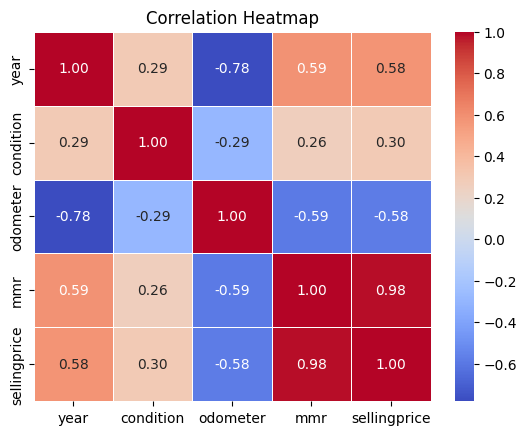

In [217]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap');

**Conclusions from the correlation heatmap:**

- **Strong positive correlation between MMR (Manheim Market Report) and selling price (0.98):**
  This indicates that MMR is a very good predictor for the vehicle’s selling price.

- **Negative correlation between odometer (mileage) and selling price (-0.58):**
  The higher the mileage of the vehicle, the lower its selling price.

- **Strong negative correlation between year of manufacture and odometer (-0.78):**
  Newer vehicles tend to have lower mileage, which is logical.

- **Positive correlation between year of manufacture and selling price (0.58):**
  Newer vehicles are generally sold for a higher price.

- **Weak correlation between condition and selling price (0.30):**
  The condition of the vehicle has some impact on the price, but it is not as significant as other factors.

In [218]:
numer_columns = df[['year', 'condition', 'odometer', 'sellingprice']]

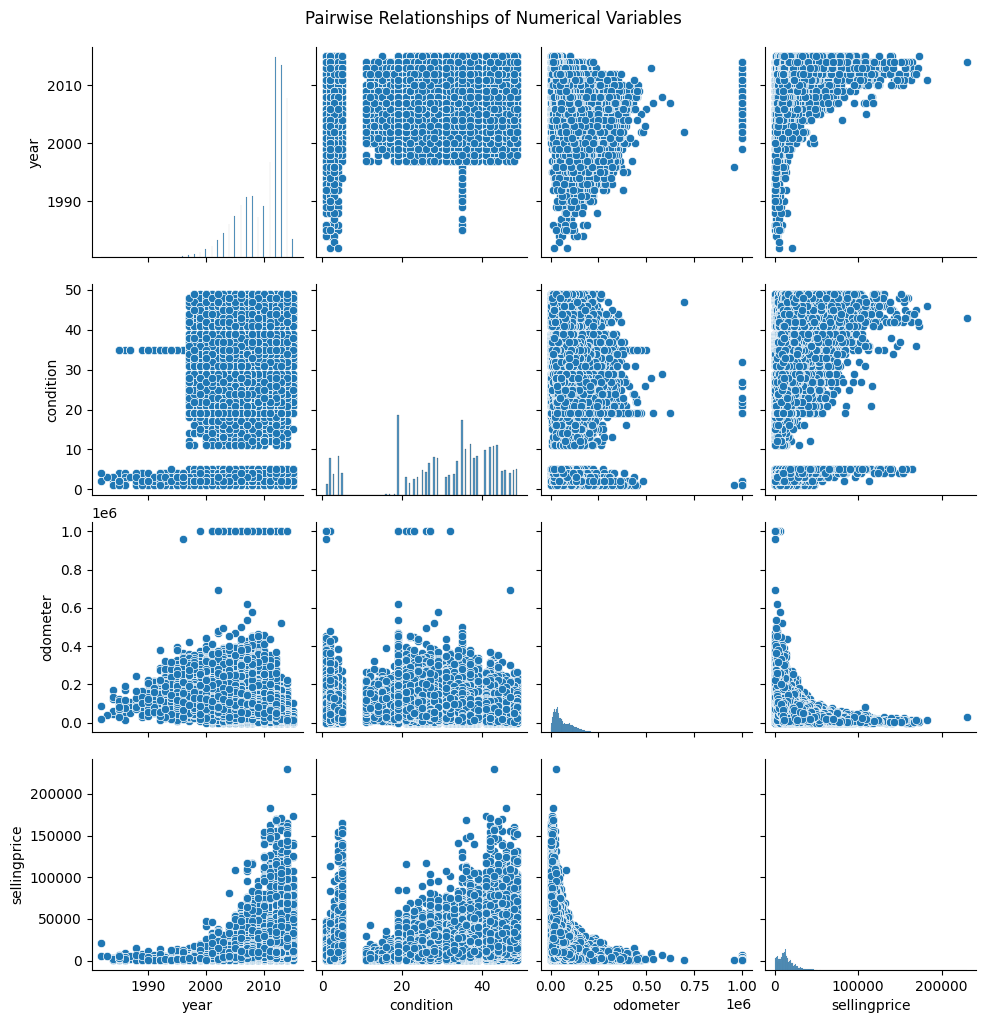

In [219]:
sns.pairplot(numer_columns)
plt.suptitle('Pairwise Relationships of Numerical Variables', y=1.02);

**Conclusions from Pairplot:**

**Distribution of Variables:**
- The year of vehicle manufacture is mostly concentrated after 2000, with a peak around 2010-2020.
- Odometer (mileage) has a long tail, indicating the presence of vehicles with very high mileage.
- Selling price also has a long tail, pointing to the existence of expensive vehicles, but most are in the lower price range.


**Relationships between Variables:**
- **Year of Manufacture vs Odometer:** An expected trend is observed – older vehicles tend to have higher mileage.
- **Year of Manufacture vs Selling Price:** Newer vehicles have higher prices, confirming previous analysis.
- **Odometer vs Selling Price:** A clear non-linear relationship is present – vehicles with lower mileage tend to have higher prices.
- The condition of the vehicle (condition) shows a significant spread of values and may require further processing or cleaning.


### The impact of the vehicle's year of manufacture on the selling price.

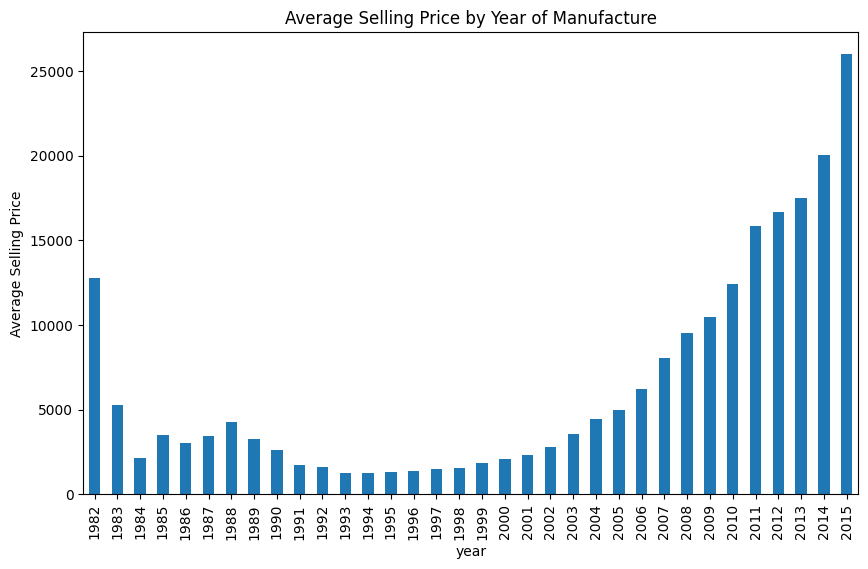

In [220]:
avg_price_by_year = df.groupby('year')['sellingprice'].mean()

avg_price_by_year.plot(kind='bar', figsize=(10,6), title="Average Selling Price by Year of Manufacture")
plt.ylabel('Average Selling Price')
plt.show()

**Conclusions from the "Average Selling Price by Year of Manufacture" Chart:**

**Relationship between Year of Manufacture and Selling Price:**

- The general trend shows that newer vehicles are more expensive.
- After 2000, the average price of vehicles rises exponentially, especially after 2010.
- **Anomaly in 1982:**  
  The high average price of vehicles from 1982 may indicate classic or rare models that have high collector value. Similar increases are seen in other older years, but overall, vehicles from before 1995 have significantly lower prices.

- **Sharp increase after 2005:**  
  Starting from 2005, prices increase significantly, which may be related to newer vehicles having better technology, higher reliability, and greater demand.

**Overall Conclusion:**  
The newer the vehicle, the higher its average price. Some older models (1982, 1987, 1990) have high average prices, likely due to their collector or rare value.

### Relationship Between Car Color and Selling Price

In [221]:
avg_price_by_color = df.groupby('color')['sellingprice'].mean().sort_values(ascending=False)
avg_price_by_color

,sellingprice
color,
other,17853.192036
charcoal,16309.750524
black,15681.261527
brown,15502.479621
off-white,15290.750520
white,14892.028003
gray,14038.527202
lime,13256.666667
orange,12884.613295


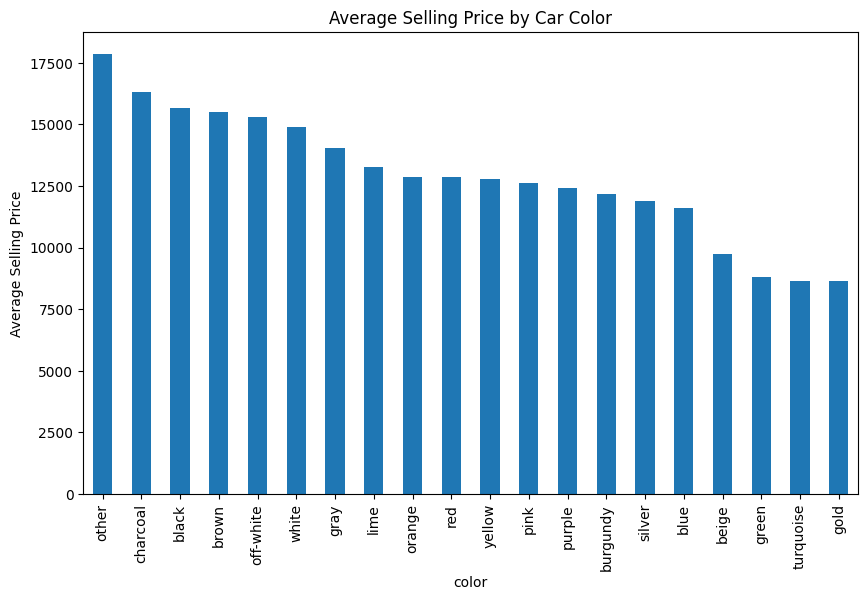

In [222]:
avg_price_by_color.plot(kind='bar', figsize=(10,6), title="Average Selling Price by Car Color")
plt.ylabel('Average Selling Price');

Uncommon colors have the highest average prices, with "other" at $17,853. Black, brown, white, and gray are also expensive, likely due to high demand. Bright colors like yellow, pink, and turquoise are cheaper. The lowest-priced cars are gold, turquoise, and green, suggesting lower popularity.

### Top 10 Sellers by Number of Sales

In [223]:
seller_counts = df['seller'].value_counts()

In [224]:
top_10_sellers = seller_counts.head(10)

In [225]:
total_sales = seller_counts.sum()

In [226]:
percentages = (top_10_sellers / total_sales) * 100

<ipython-input-227-1dbc3cd89aa0>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 0.2, f'{percentages[i]:.2f}%', ha='center', va='bottom', fontsize=10)


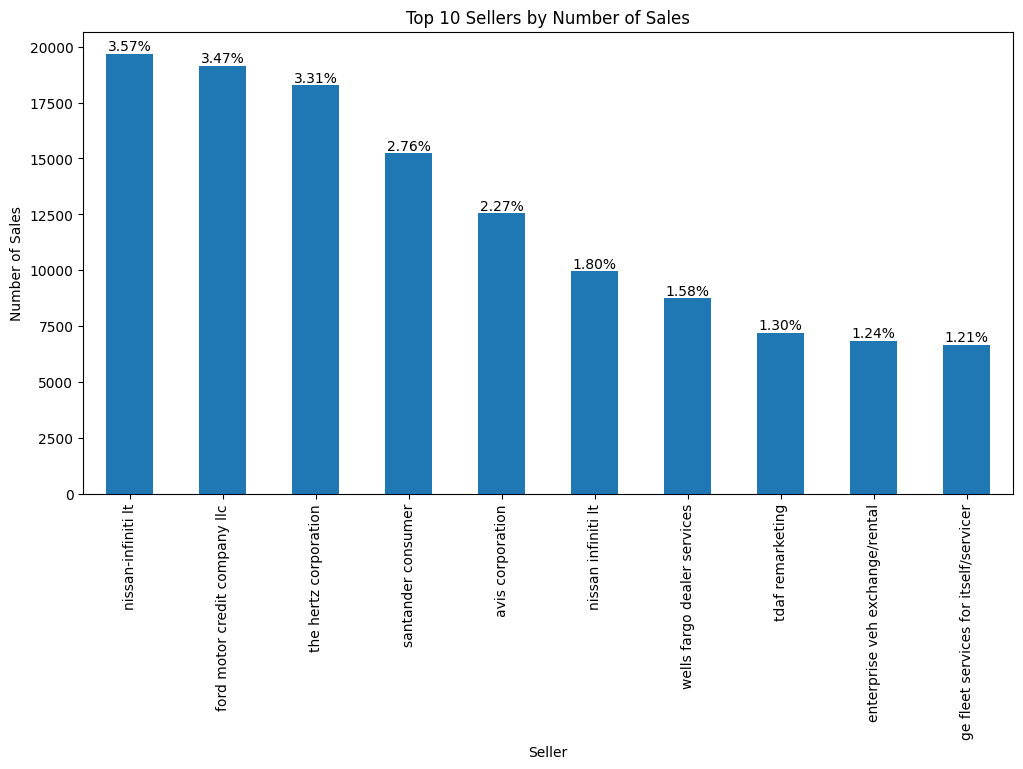

In [227]:
fig, ax = plt.subplots(figsize=(12,6))

top_10_sellers.plot(kind='bar', ax=ax)

for i, v in enumerate(top_10_sellers):
    ax.text(i, v + 0.2, f'{percentages[i]:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Sellers by Number of Sales')
plt.xlabel('Seller')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90);

### Most Popular Car Makes by State

In [228]:
state_make_counts = df.groupby(['state', 'make']).size().reset_index(name='count')

In [229]:
most_popular_make_per_state = state_make_counts.loc[state_make_counts.groupby('state')['count'].idxmax()]

In [230]:
most_popular_make_per_state = most_popular_make_per_state.sort_values(by='count')
most_popular_make_per_state

,state,make,count
32,al,Chevrolet,6
878,ns,Hyundai,18
852,nm,Ford,29
1020,ok,Ford,29
303,hi,Ford,195
1071,or,Chevrolet,219
9,ab,Ford,250
426,la,Ford,408
1205,qc,Ford,421
680,ms,Ford,452


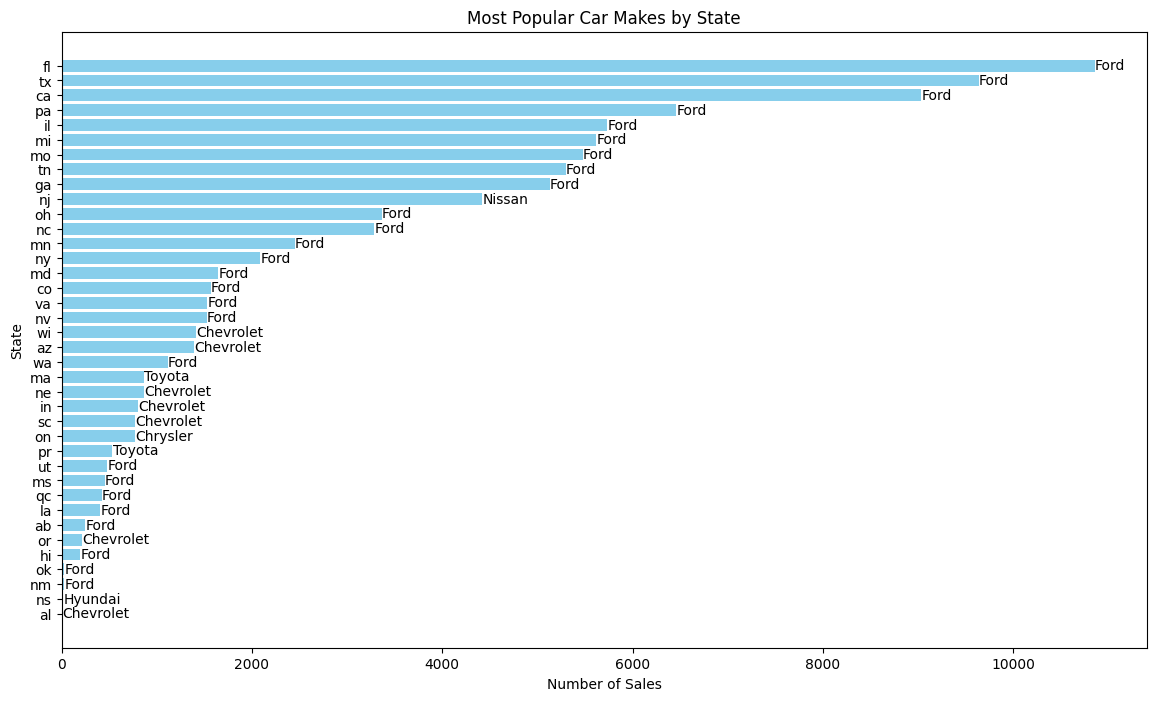

In [231]:
plt.figure(figsize=(14,8))
bars = plt.barh(most_popular_make_per_state['state'], most_popular_make_per_state['count'], color='skyblue')

plt.title('Most Popular Car Makes by State')
plt.xlabel('Number of Sales')
plt.ylabel('State')

for i, bar in enumerate(bars):
    bar_width = bar.get_width()
    text = most_popular_make_per_state['make'].iloc[i]

    plt.text(bar_width + 1, bar.get_y() + bar.get_height() / 2, text, ha='left', va='center', fontsize=10, color='black')

Ford is the most popular brand in most states, especially in Texas, California, and Florida. Chevrolet and Toyota also have a notable presence but with lower numbers.

### Transmission Type Distribution

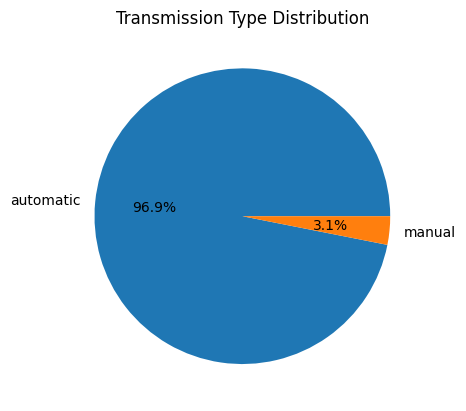

In [232]:
df['transmission'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Transmission Type Distribution')
plt.ylabel('')
plt.show()

### Number of Cars by Body Type and Transmission

In [233]:
pivot_table_transm_body = df.pivot_table(index='body', columns='transmission', aggfunc='size', fill_value=0)

In [234]:
pivot_table_transm_body

transmission,automatic,manual
body,,
convertible,9706,1115
coupe,16449,3308
e-series van,1822,0
hatchback,22831,3223
sedan,252144,5884
suv,141026,1773
truck,46357,997
van,29708,11
wagon,15095,856


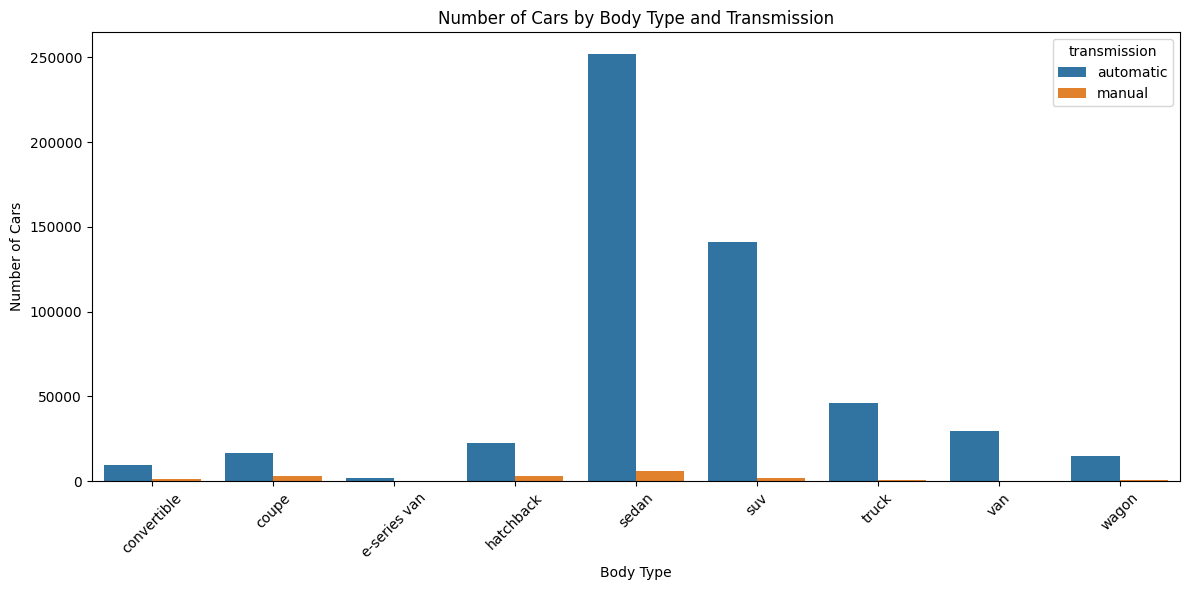

In [235]:
plt.figure(figsize=(12, 6))
pivot_table_transm_body_reset = pivot_table_transm_body.reset_index().melt(id_vars='body', value_name='count', var_name='transmission')
sns.barplot(x='body', y='count', hue='transmission', data=pivot_table_transm_body_reset)


plt.title('Number of Cars by Body Type and Transmission')
plt.xlabel('Body Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)

plt.tight_layout();

Automatic transmission dominates across all categories. The most popular body type is the sedan, followed by SUVs. Manual transmission is more common in coupes, hatchbacks, and sedans, while it is almost absent in commercial vehicles.

### Top 10 Most Popular Body Types for Each Car Make

In [236]:
most_popular_body_by_make = df.groupby(['make', 'body']).size().reset_index(name='count')
most_popular_body_by_make = most_popular_body_by_make.loc[most_popular_body_by_make.groupby('make')['count'].idxmax()]
most_popular_body_by_make

,make,body,count
2,Acura,sedan,3595
5,Airstream,sedan,1
6,Am General,sedan,2
7,Amc,sedan,1
9,Aston Martin,coupe,12
...,...,...,...
224,Tesla,sedan,23
228,Toyota,sedan,22341
233,Unknown,sedan,44
236,Volkswagen,sedan,8533


In [237]:
top_n_makes = most_popular_body_by_make.nlargest(10, 'count')
top_n_makes

,make,body,count
170,Nissan,sedan,32227
74,Ford,suv,28469
39,Chevrolet,sedan,27051
228,Toyota,sedan,22341
96,Hyundai,sedan,17055
111,Jeep,suv,15271
86,Honda,sedan,13888
23,Bmw,sedan,12179
55,Dodge,sedan,10727
148,Mercedes-Benz,sedan,10391


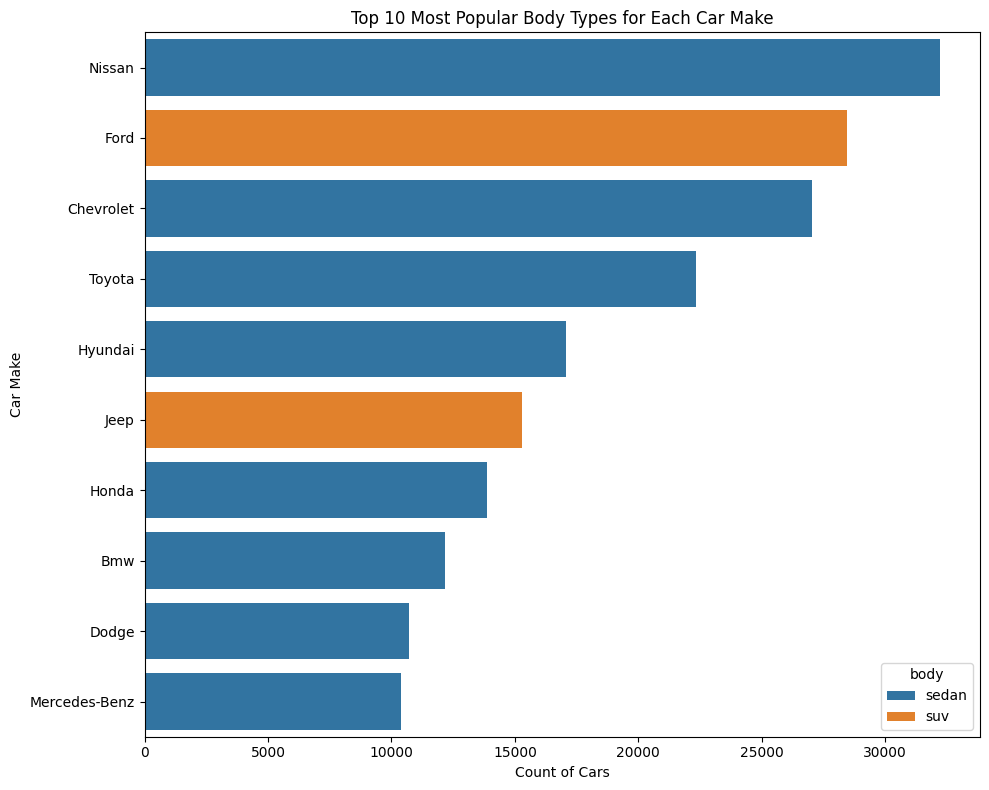

In [238]:
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='make', hue='body', data=top_n_makes)

plt.title('Top 10 Most Popular Body Types for Each Car Make')
plt.xlabel('Count of Cars')
plt.ylabel('Car Make')

plt.tight_layout();

## Exploring Relationships and Variability in Key Features

### Analysis of Variability and Deviation between 'sellingprice' and 'mmr

In [239]:
df['price_diff'] = df['sellingprice'] - df['mmr']
mean_diff = df['price_diff'].mean()

print(f"Mean deviation between selling price and MMR: {mean_diff}")

Mean deviation between selling price and MMR: -144.859385665529


The average selling price of the cars is lower than the average market price (MMR) by 144.86. This could indicate that the cars being sold are likely offered with some discounts or are sold at prices below the average market level.

### Statistical significance test of the difference between selling price and MMR.

In [240]:
t_stat, p_value = ttest_rel(df['sellingprice'], df['mmr'])

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between selling price and MMR.")
else:
    print("There is no statistically significant difference between selling price and MMR.")

t-statistic: -61.94068221294101
p-value: 0.0
There is a statistically significant difference between selling price and MMR.


**The results of the t-test show that there is a statistically significant difference between the selling price and the Manheim Market Report (MMR).**

1. **t-statistic: -61.94**  
   This value indicates how large the difference between the mean selling price and MMR is, in terms of standard error units. Since the value is **negative**, it suggests that the **selling price is, on average, lower than the MMR**, meaning that cars are sold at a price lower than the average market price.  
   The **large magnitude** of the t-statistic indicates a strong difference between the means.

2. **p-value: 0.0**  
   A **p-value of 0.0** means that the probability of the observed difference between the selling price and MMR occurring by chance is virtually zero.  
   The p-value of **0.0** clearly indicates that the difference between the selling price and the average market price is **statistically significant**.

**Conclusion:**  
There is indeed a **statistically significant difference** between the selling price and MMR.  
Since the **p-value is very low (0.0)**, we can confidently conclude that the selling prices and average market prices are **significantly different** from each other.

### Analysis of Associations between 'Color' and 'Interior' Columns

In [241]:
color_dummies = pd.get_dummies(df['color'], prefix='color')
interior_dummies = pd.get_dummies(df['interior'], prefix='interior')

In [242]:
df_encoded = pd.concat([df, color_dummies, interior_dummies], axis=1)
df_encoded.head()

,year,body,transmission,vin,state,condition,odometer,color,interior,seller,...,interior_green,interior_off-white,interior_orange,interior_other,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow
0,2015,suv,automatic,5XYKTCA69FG566472,ca,5.0,16639.0,white,black,kia motors america inc,...,False,False,False,False,False,False,False,False,False,False
1,2015,suv,automatic,5XYKTCA69FG561319,ca,5.0,9393.0,white,beige,kia motors america inc,...,False,False,False,False,False,False,False,False,False,False
2,2014,sedan,automatic,WBA3C1C51EK116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),...,False,False,False,False,False,False,False,False,False,False
3,2015,sedan,automatic,YV1612TB4F1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,...,False,False,False,False,False,False,False,False,False,False
4,2014,sedan,automatic,WBA6B2C57ED129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),...,False,False,False,False,False,False,False,False,False,False


In [243]:
frequent_itemsets = apriori(df_encoded[color_dummies.columns.tolist() + interior_dummies.columns.tolist()],
                            min_support=0.01,
                            use_colnames=True)

In [244]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(interior_black),(color_black),0.442866,0.200543,0.112371,0.253736,1.265242,1.0,0.023557,1.071278,0.376279,0.211606,0.066536,0.407034
1,(color_black),(interior_black),0.200543,0.442866,0.112371,0.560333,1.265242,1.0,0.023557,1.267172,0.262225,0.211606,0.210841,0.407034
2,(interior_gray),(color_blue),0.317520,0.091198,0.035580,0.112056,1.228712,1.0,0.006623,1.023490,0.272740,0.095353,0.022951,0.251098
3,(color_blue),(interior_gray),0.091198,0.317520,0.035580,0.390141,1.228712,1.0,0.006623,1.119078,0.204818,0.095353,0.106407,0.251098
4,(interior_black),(color_gray),0.442866,0.149731,0.075648,0.170816,1.140819,1.0,0.009338,1.025429,0.221557,0.146337,0.024798,0.338023
5,(color_gray),(interior_black),0.149731,0.442866,0.075648,0.505230,1.140819,1.0,0.009338,1.126047,0.145174,0.146337,0.111937,0.338023
6,(interior_gray),(color_gray),0.317520,0.149731,0.053999,0.170065,1.135808,1.0,0.006457,1.024501,0.175198,0.130669,0.023915,0.265354
7,(color_gray),(interior_gray),0.149731,0.317520,0.053999,0.360642,1.135808,1.0,0.006457,1.067445,0.140625,0.130669,0.063184,0.265354
8,(interior_black),(color_other),0.442866,0.044606,0.021700,0.048999,1.098489,1.0,0.001946,1.004620,0.160928,0.046589,0.004598,0.267741
9,(color_other),(interior_black),0.044606,0.442866,0.021700,0.486483,1.098489,1.0,0.001946,1.084939,0.093845,0.046589,0.078289,0.267741


Based on the obtained association rules for **color** and **interior**, the following conclusions can be made:

1. **Black exterior color and black interior** is one of the most popular combinations among all options. It has a high **confidence** (56%) and **lift** (1.27), indicating a strong association between black exterior color and black interior.
   
2. **Blue exterior color with gray interior** shows a less pronounced association, but it is still a relatively common combination. The **lift** (1.23) is not as high, but it still suggests a notable connection between blue exterior color and gray interior.

3. Combinations involving **red** and **silver** exterior colors are less popular, but they still show some association, although they are not as frequent as the combinations mentioned above.

## General Conclusions:

1. **MMR and Selling Price**:
   - There is a **strong positive correlation (0.98)** between MMR (Manheim Market Report) and selling price, making MMR a very reliable predictor for vehicle pricing.
   - **Mileage** has a **negative correlation (-0.58)** with the selling price, meaning higher mileage generally leads to a lower price.
   - **Year of manufacture** is positively correlated with selling price (0.58) and negatively correlated with mileage (-0.78), indicating that newer cars tend to have lower mileage and higher prices.
   - **Condition** has a weak correlation (0.30) with selling price, meaning the condition of the vehicle has some impact but is not as significant as other factors.

2. **Distribution and Relationships**:
   - Vehicles manufactured after 2000 are the most common, with a peak around 2010-2020.
   - Vehicles with higher mileage tend to have lower prices.
   - Older vehicles generally have higher mileage, confirming expected trends.

3. **Price Trends Over Time**:
   - **Post-2000**: Vehicle prices rise significantly, particularly after 2010, likely due to better technology, reliability, and demand.
   - **1982 Anomaly**: Vehicles from 1982 show a high average price, suggesting rare or classic models with collector value.
   - The sharp increase in prices post-2005 indicates improvements in vehicle technology and features.

4. **Color Trends**:
   - **Uncommon colors** like "other," black, brown, and white generally fetch higher prices, likely due to higher demand and rarity.
   - **Bright colors** such as yellow, pink, and turquoise are cheaper, possibly due to lower popularity.
   - **Gold, turquoise, and green** have the lowest average prices, indicating less demand.

5. **Brand Popularity**:
   - **Ford** is the most popular brand, especially in states like Texas, California, and Florida. Other popular brands include Nissan, Chevrolet, and Toyota.
   - **Sedans** dominate the car types, with a significant presence of SUVs.
   - **Manual transmissions** are more common in sports-oriented cars (like coupes and hatchbacks), while **automatic transmissions** are dominant in other categories.

6. **Selling Price vs. MMR**:
   - The **selling price** is **significantly lower** than the **MMR**, with an average difference of 144.86. This suggests that the cars are sold at a discount compared to the average market price.
   - **Statistical significance**: A t-test confirms a **statistically significant difference** between the selling price and MMR, with a p-value of 0.0.

7. **Interior and Exterior Color Combinations**:
   - **Black exterior and black interior** is the most popular combination, with strong confidence (56%) and lift (1.27).
   - **Blue exterior with gray interior** is a notable but less popular combination (lift of 1.23).
   - **Red and silver exterior combinations** are less frequent, indicating lower popularity.